In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from CoolProp import AbstractState
from CoolProp.CoolProp import PhaseSI, PropsSI, get_global_param_string
import scipy.constants as const
import sympy as sp
from scipy.optimize import curve_fit
import math

Hydrogen adsorption isotherms from 1.9 to 4.2 K:

In [3]:
## 208C:

a_208=-550.5598268753827 
da_208=9.092746133428872
b_208=6.031728054281607 
db_208=0.0037578796936198716

##SC2:
a_sc=-516.3662646667254 
da_sc=15.939329376658684
b_sc=5.961353037630107 
db_sc=0.006282425450969563

#V_mono=np.exp(b)
#B=-a

In [4]:
#Fehlerfortpflanzung
x1= sp.symbols('b')
dx1 = sp.symbols('db')
f=sp.exp(x1)



df_dx1 = sp.diff(f, x1)


df = sp.sqrt((df_dx1 * dx1)**2 )

f_latex = sp.latex(f)
df_latex = sp.latex(df)



print(f"Funktion f(x, y) = {f_latex}")
print(f"Fehlerfortpflanzungsformel: df = {df_latex}")
f_val=f.subs({x1:b_208})
df_val = df.subs({x1:b_208,dx1:db_208})
V_mono_208=f_val
dV_mono_208=df_val
print("208C: ",f_val, df_val )
f_val=f.subs({x1:b_sc})
df_val = df.subs({x1:b_sc,dx1:db_sc})
V_mono_sc2=f_val
dV_mono_sc2=df_val
print("SC2: ",f_val, df_val )


Funktion f(x, y) = e^{b}
Fehlerfortpflanzungsformel: df = \sqrt{db^{2} e^{2 b}}
208C:  416.434028574333 1.56490897971180
SC2:  388.134930282787 2.43842876441888


In [5]:
print(388.134930282787/416.434028574333 )

0.9320442222542948




ln(v_ads/vmono)=-B*kb2*T2*(ln(ps)-ln(p))^2

-sqrt(ln(v_ads/vmono)/-B)(/kbT)+ln(ps)=ln(p)

dln(p)/d(1/T)=-sqrt(ln(v_ads/vmono)/-B)*k

Ead(v_ads)=sqrt(ln(v_ads/vmono)/-D)

-D=a

In [6]:
#Fehlerfortpflanzung
x1,x2= sp.symbols('a V_mono')
dx1,dx2 = sp.symbols('da dV_mono')
f=(sp.log(0.72*x2/x2)/x1)**0.5



df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)

df = sp.sqrt((df_dx1 * dx1)**2+(df_dx2 * dx2)**2 )/f

f_latex = sp.latex(f)
df_latex = sp.latex(df)

print(f"Funktion f(x, y) = {f_latex}")
print(f"Fehlerfortpflanzungsformel: df = {df_latex}")


f_val=f.subs({x1:a_208,x2:V_mono_208})
df_val = df.subs({x1:a_208,x2:V_mono_208,dx1:da_208,dx2:dV_mono_208})

print("208C (mit rel_err): ",f_val, df_val )
f_val=f.subs({x1:a_sc,x2:V_mono_sc2})
df_val = df.subs({x1:a_sc,x2:V_mono_sc2,dx1:da_sc,dx2:dV_mono_sc2})

print("SC2 (mit rel_err): ",f_val, df_val )


Funktion f(x, y) = 0.57315274314273 \left(- \frac{1}{a}\right)^{0.5}
Fehlerfortpflanzungsformel: df = \frac{0.5 \sqrt{\frac{da^{2} \left(- \frac{1}{a}\right)^{1.0}}{a^{2}}}}{\left(- \frac{1}{a}\right)^{0.5}}
208C (mit rel_err):  0.0244268865842312 0.00825772757979214
SC2 (mit rel_err):  0.0252226924702809 0.0154341312236444


In [7]:
print( 0.0244268865842312*0.00825772757979214)


delta_x = 24.43 - 29.9 
    
# Calculate the combined standard deviation
sigma_delta_x = np.sqrt(2.1**2 + 0.21**2)

# Calculate the sigma deviation
sigma_dev = delta_x / sigma_delta_x
print(sigma_dev )

0.00020171057503506063
-2.5918349668803042


/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7959/2043942025.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(theta,(np.log(theta)/-550.5598268753827)**0.5*1000,label="208C")
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7959/2043942025.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(theta,(np.log(theta)/-516.3662646667254 )**0.5*1000,label="SC2")
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7959/2043942025.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(theta,(np.log(theta)/-3075)**0.5*1000,label="Edelstahl")


Text(0.5, 1.0, 'Adsorptionsenergie $E_{ads}(\\Theta)$')

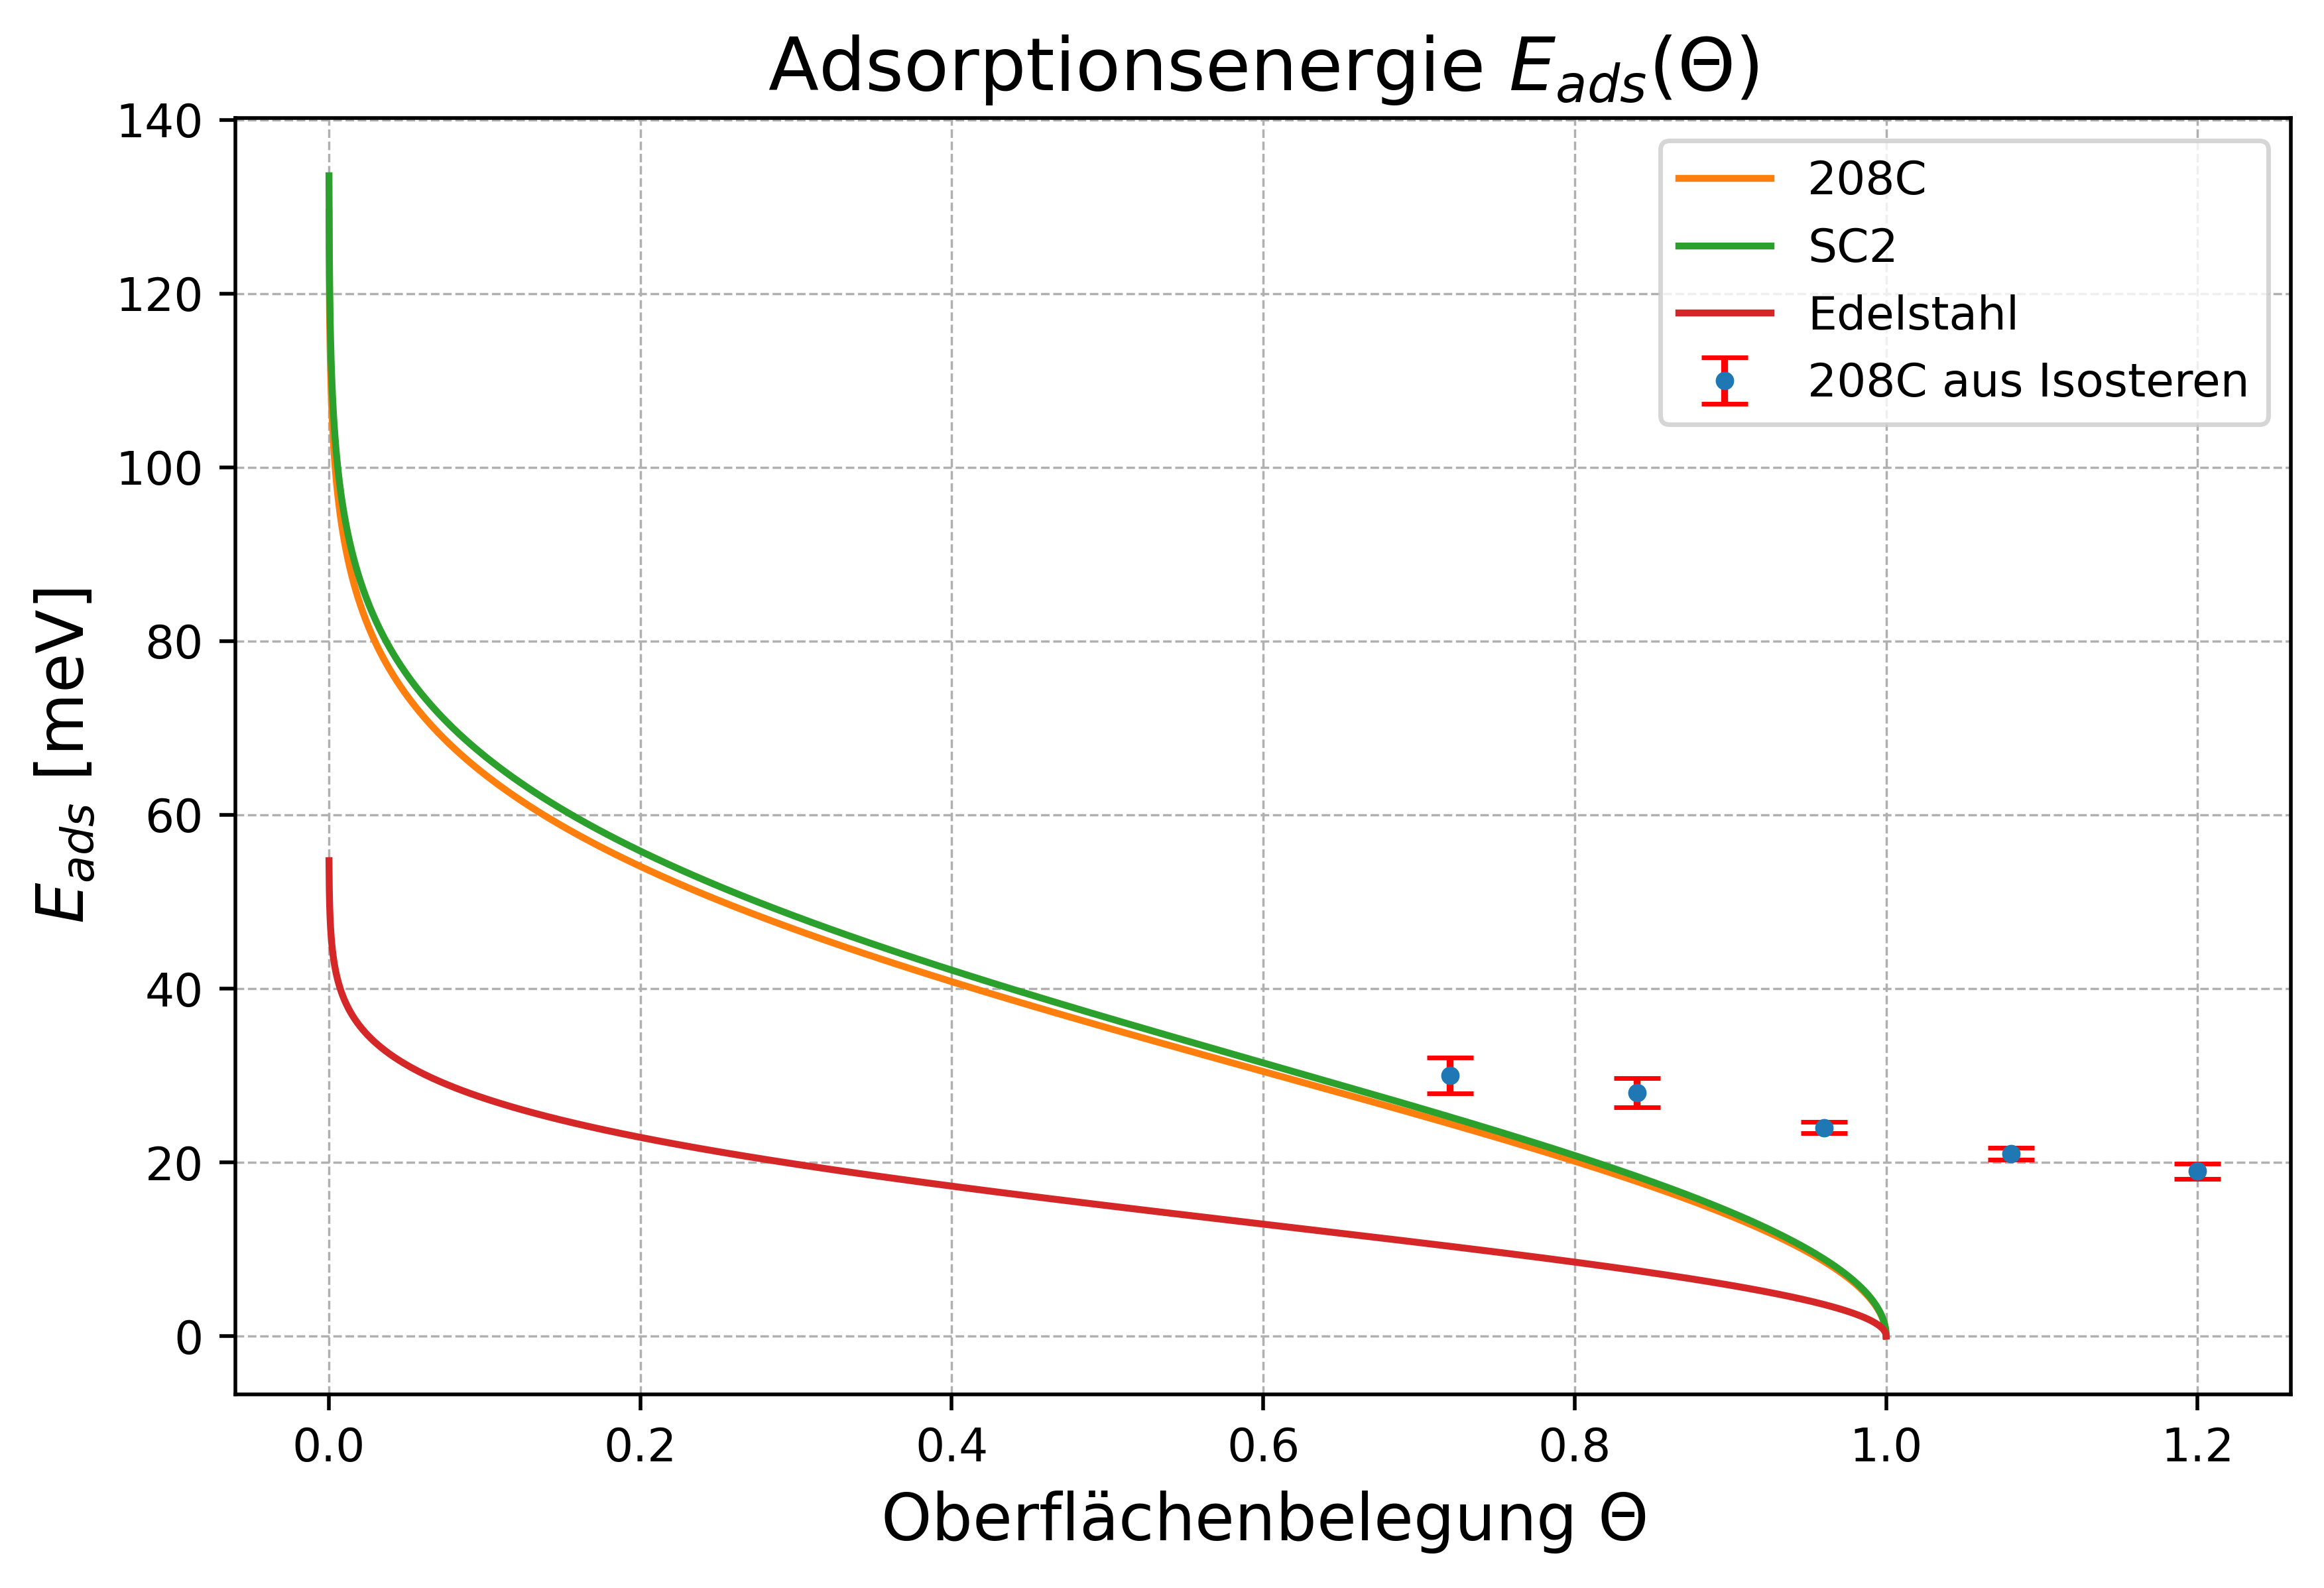

In [8]:
theta=np.linspace(0,1,10000)
plt.figure(figsize=(8, 5), dpi=500)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  
plt.errorbar([1.2,1.08,0.96,0.84,0.72],[19,21,24,28,30],yerr=[0.87,0.714,0.636,1.658,2.052], fmt='.', capsize=5, capthick=1, ecolor='red',label="208C aus Isosteren") 
plt.plot(theta,(np.log(theta)/-550.5598268753827)**0.5*1000,label="208C")
plt.plot(theta,(np.log(theta)/-516.3662646667254 )**0.5*1000,label="SC2")
plt.plot(theta,(np.log(theta)/-3075)**0.5*1000,label="Edelstahl")
plt.legend()
plt.xlabel(r"Oberflächenbelegung $\Theta$",fontsize=14)
plt.ylabel(r"$E_{ads}$ [meV]",fontsize=14)
plt.title(r"Adsorptionsenergie $E_{ads}(\Theta)$",fontsize=16)

In [18]:
print(6.02214076e23*20e-3/6.242e+18)

1929.5548734380006


Theta_limit 0.9826078662825104


/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7959/3189587271.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot([1e-16, 1e-10], [ 0.9826078662825104,  0.9826078662825104], 'b--',color="green")
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7959/3189587271.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot([1e-10, 1e-10], [0.9355239774229425,  0.9826078662825104], 'b--',color="green",label="Designlimit SIS100 (1e-10 pa)")


(1e-16, 0.001)

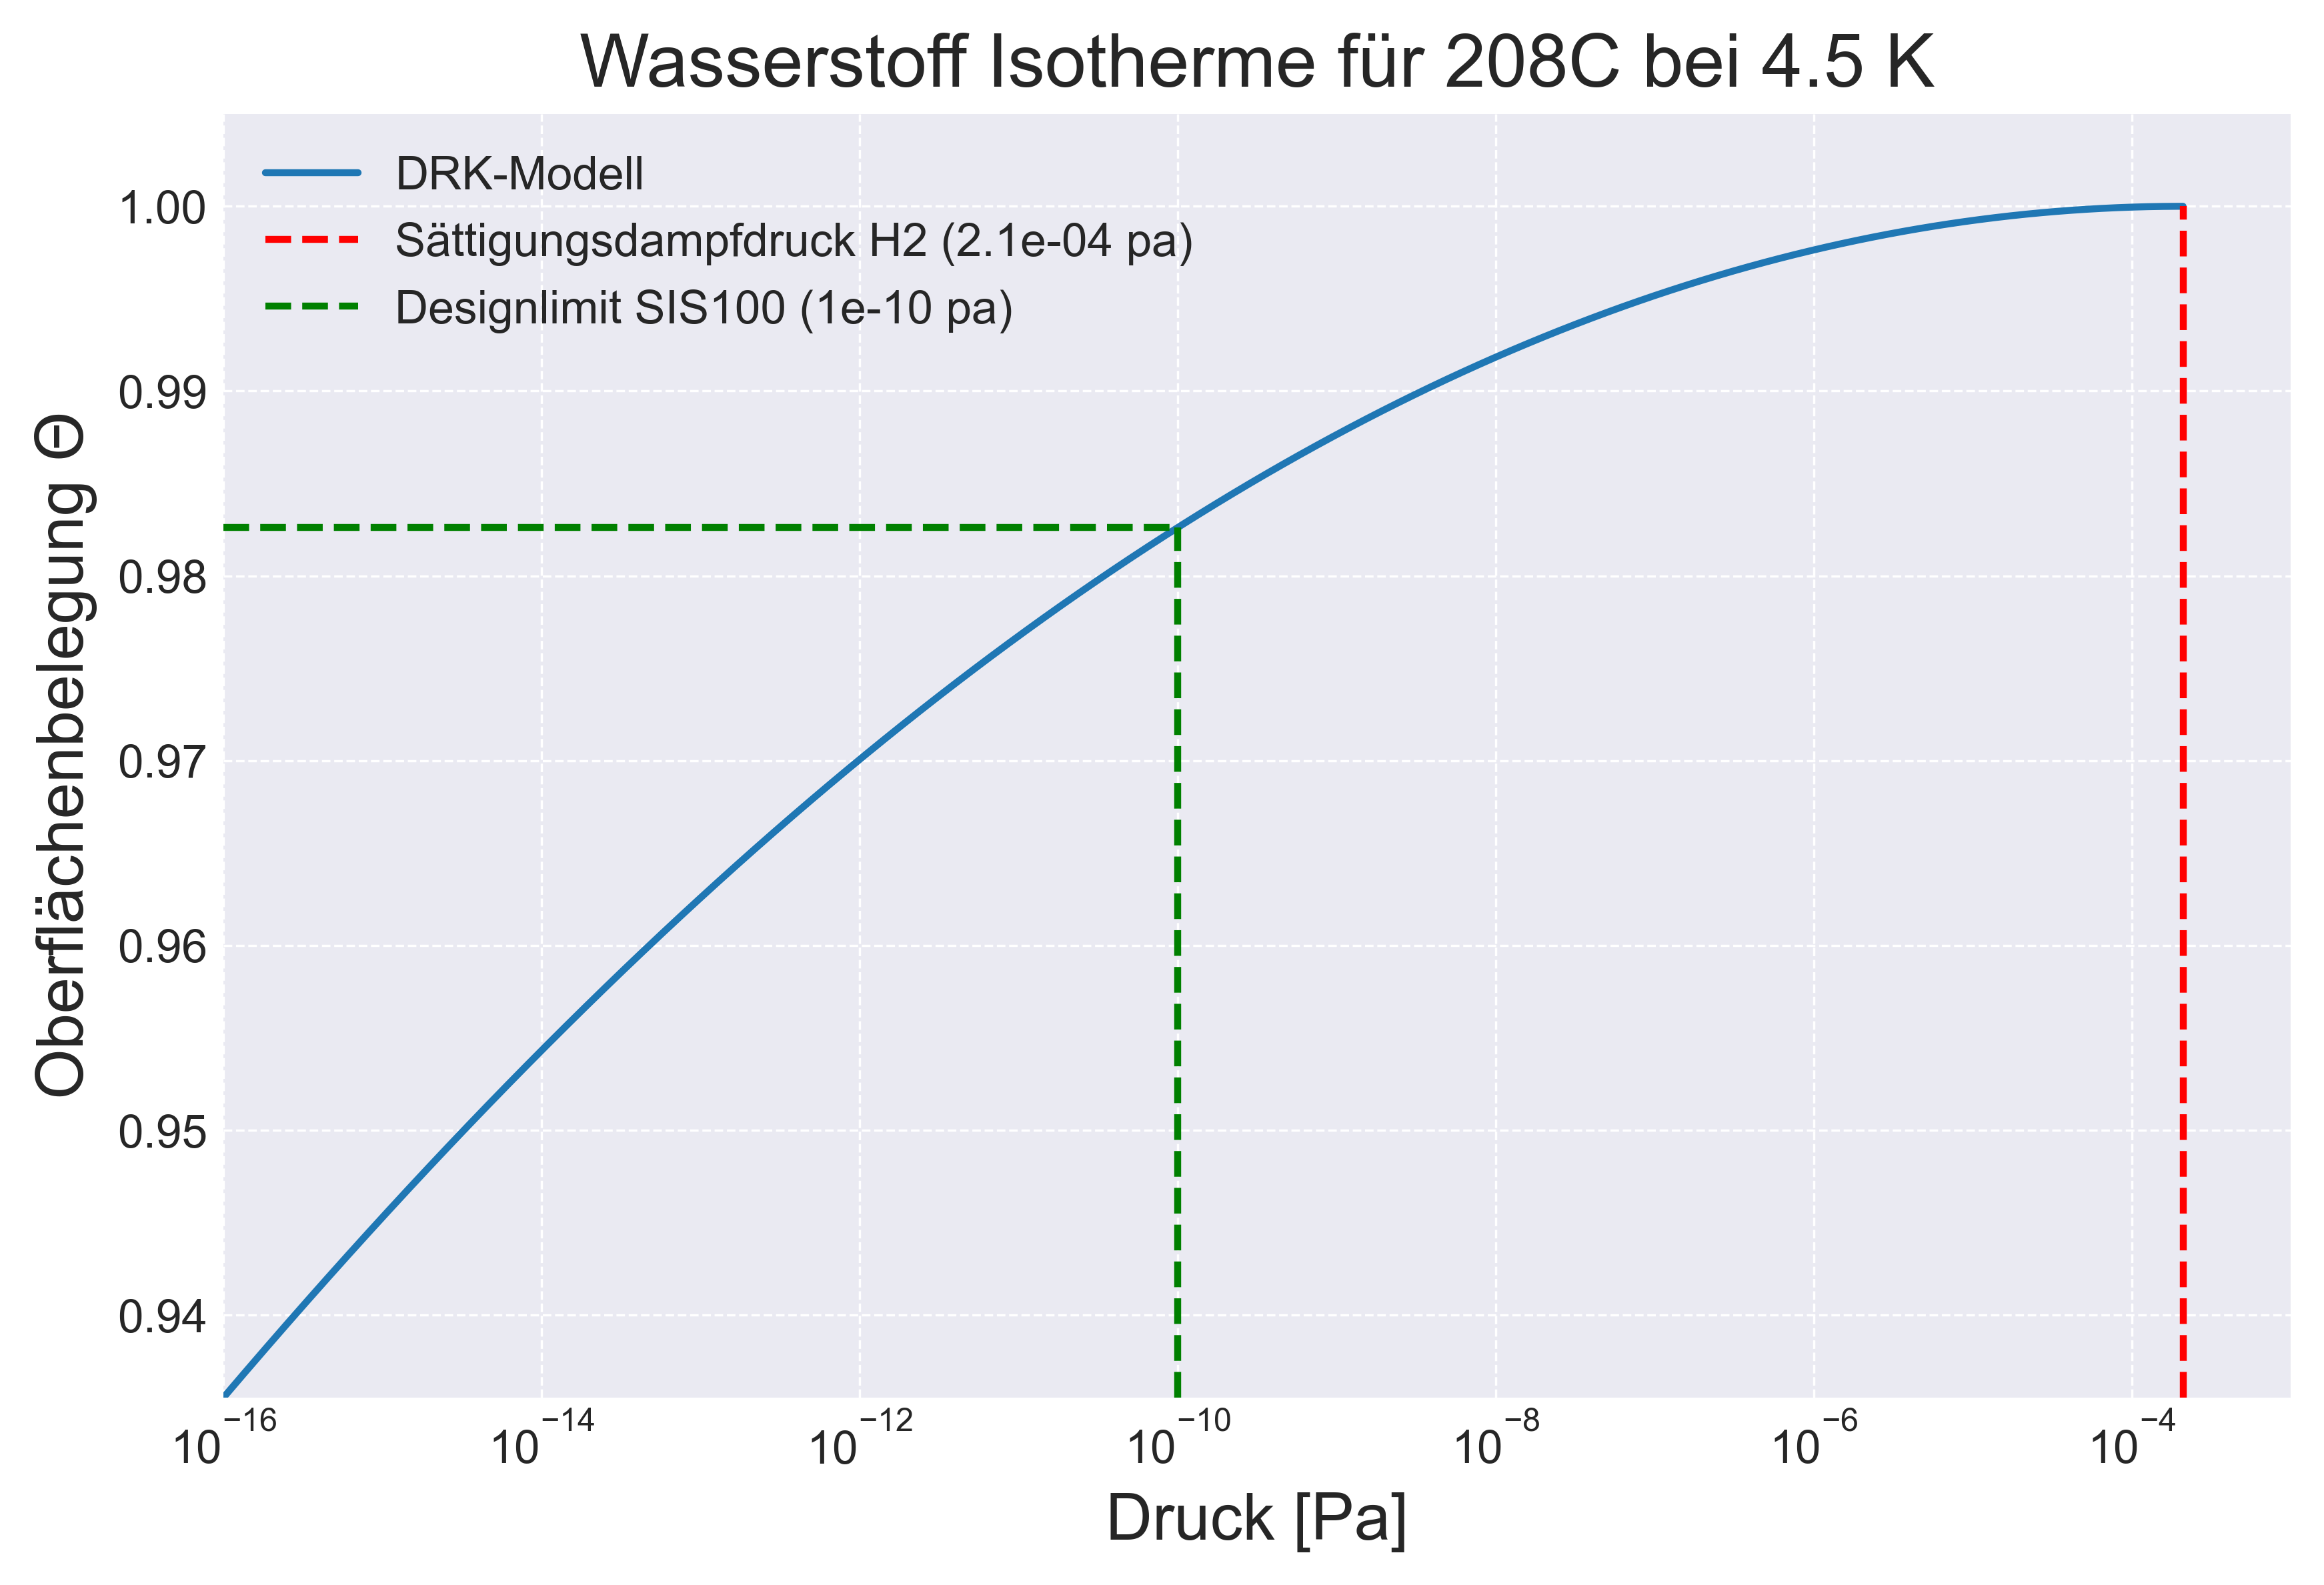

In [9]:
kb=8.617333262e-05#ev/K
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil
  
T=4.5
ps=0.00000000021004*10**6
 
p=np.logspace(-16,np.log10(ps),10000)
plt.figure(figsize=(8, 5), dpi=500)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  
   
Theta=np.exp(a_208*(kb*T*np.log(p/ps))**2)

plt.plot(p,Theta,label=f"DRK-Modell")
plt.title("Wasserstoff Isotherme für 208C bei 4.5 K",fontsize=16)    
print("Theta_limit",np.exp(a_208*(kb*T*np.log(1e-10/ps))**2))
plt.xscale("log")    
plt.ylabel(r"Oberflächenbelegung $\Theta$",fontsize=14)  
plt.xlabel(r"Druck [Pa]",fontsize=14)  
plt.plot([0.00000000021004*10**6,0.00000000021004*10**6],[0.9355239774229425,1],label="Sättigungsdampfdruck H2 (2.1e-04 pa)",color="red",linestyle="--")

plt.plot([1e-16, 1e-10], [ 0.9826078662825104,  0.9826078662825104], 'b--',color="green")
plt.plot([1e-10, 1e-10], [0.9355239774229425,  0.9826078662825104], 'b--',color="green",label="Designlimit SIS100 (1e-10 pa)")
plt.legend()
plt.ylim((0.9355239774229425,1.005))
plt.xlim((1e-16, 1e-3))

In [10]:
n_limit=0.9826078662825104*V_mono_208*1/22400
print(n_limit, "mol/g")

m_ads=30*0.8

n_limit=n_limit*30

print(n_limit, "mol pro Pumpe")

0.0182674710832525 mol/g
0.548024132497574 mol pro Pumpe


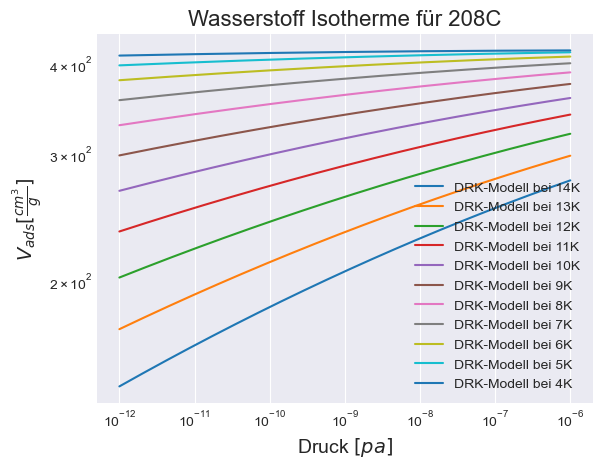

In [11]:
### 208C:
a=-550.5598268753827
b= 6.031728054281607 
V_mono=np.exp(b)
B=-a
kb=8.617333262e-05#ev/K
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil
  
T=[14,13,12,11,10,9,8,7,6,5,4]
ps=np.array([0.0075414,  0.0037622,0.0017024,0.00068690,0.00023587,0.000064918, 0.000013128,0.0000017044, 0.00000011353,0.0000000025947,0.0000000000091016])*10**6
for t in enumerate (T):
    
    
    p=np.logspace(-12,-6,10000)
    
    V_ads=V_mono*np.exp(-B*(kb*t[1]*np.log(p/ps[t[0]]))**2)
    plt.plot(p,V_ads,label=f"DRK-Modell bei {t[1]}K")
plt.title("Wasserstoff Isotherme für 208C",fontsize=16)    
plt.yscale("log")    
plt.xscale("log")    
plt.ylabel(r"$V_{ads} [\frac{cm^3}{g}]$",fontsize=14)  
plt.xlabel(r"Druck $[pa]$",fontsize=14)   
plt.legend()

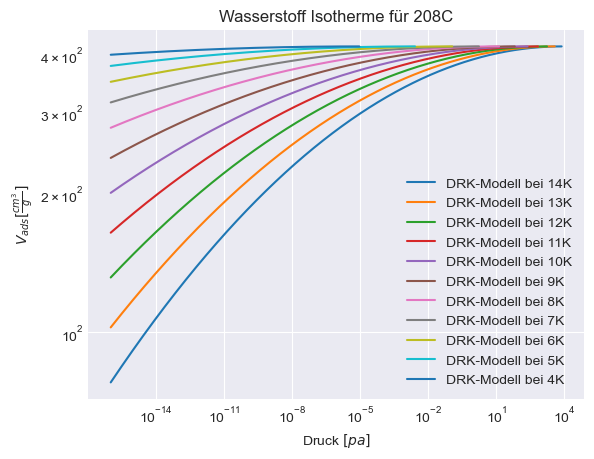

In [12]:
### 208C:
a=-550.5598268753827
b= 6.031728054281607 
V_mono=np.exp(b)
B=-a
kb=8.617333262e-05#ev/K
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil
  
T=[14,13,12,11,10,9,8,7,6,5,4]
ps=np.array([0.0075414,  0.0037622,0.0017024,0.00068690,0.00023587,0.000064918, 0.000013128,0.0000017044, 0.00000011353,0.0000000025947,0.0000000000091016])*10**6
for t in enumerate (T):
    
    
    p=np.logspace(-16,np.log10(ps[t[0]]),10000)
    
    V_ads=V_mono*np.exp(-B*(kb*t[1]*np.log(p/ps[t[0]]))**2)
    plt.plot(p,V_ads,label=f"DRK-Modell bei {t[1]}K")
plt.title("Wasserstoff Isotherme für 208C")    
plt.yscale("log")    
plt.xscale("log")    
plt.ylabel(r"$V_{ads} [\frac{cm^3}{g}]$")  
plt.xlabel(r"Druck $[pa]$")   
plt.legend()

[-115.30637716   17.08021145]


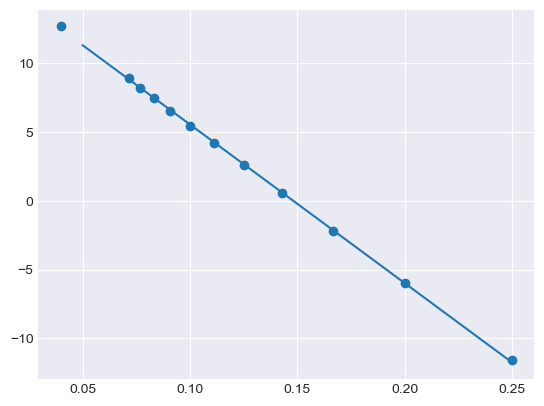

In [13]:
T=np.array([25,14,13,12,11,10,9,8,7,6,5,4])
ps=np.array([ 0.32100,0.0075414,  0.0037622,0.0017024,0.00068690,0.00023587,0.000064918, 0.000013128,0.0000017044, 0.00000011353,0.0000000025947,0.0000000000091016])*10**6
def linear_model(x, a, b):
    return a * x + b    
popt, pcov = curve_fit(linear_model, 1/T, np.log(ps))
print(popt)
plt.scatter(1/T,np.log(ps))
T_in_s=np.linspace(0.05,0.25,100)
plt.plot(T_in_s,-115.30637716*T_in_s+17.08021145)


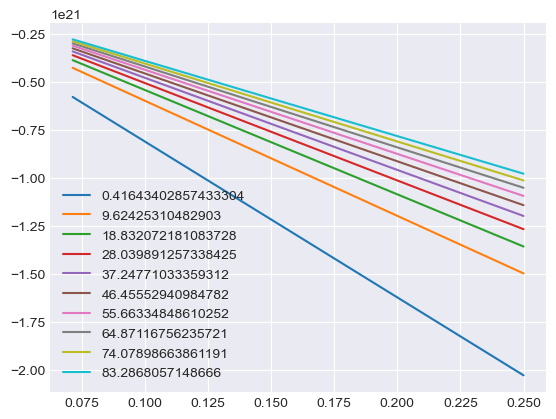

In [14]:


T=np.linspace(4,14,100)
V_ads=np.linspace(0.001,0.2,10)*V_mono


for v in V_ads:
    p=-np.sqrt(np.log(v/V_mono)/-B)/(1.38e-23*T)-115.30637716*1/T+17.08021145
    plt.plot(1/T,p,label=f"{v}")
plt.legend()

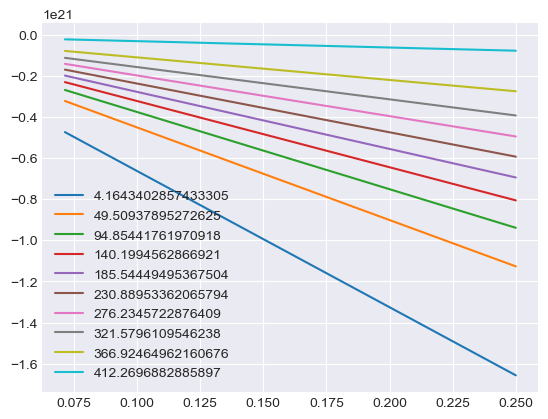

In [15]:
T=np.linspace(4,14,100)
V_ads=np.linspace(0.01,0.99,10)*V_mono
Ts=14
ps=0.0075414*10**6

for v in V_ads:
    
    a=-np.sqrt(np.log(v/V_mono)/-B)/(1.38e-23) #k Einheit ist noch falsch!
    b=1
    plt.plot(1/T,a/T+b,label=f"{v}")
plt.legend()

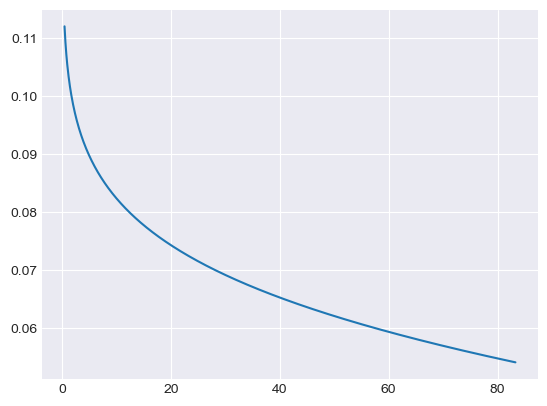

In [16]:

V_ads=np.linspace(0.001,0.2,1000)*V_mono


p=np.sqrt(np.log(V_ads/V_mono)/-B) 
plt.plot(V_ads,p)


In [17]:
print(()/(1.27*10**15))

TypeError: unsupported operand type(s) for /: 'tuple' and 'float'